________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-555-__ipython-input__.get_data...
get_data()
_________________________________________________________get_data - 0.0s, 0.0min


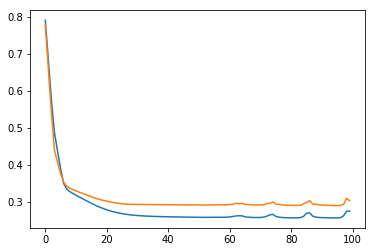

In [1]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from numpy import *
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
import numpy as np
import matplotlib.pyplot as plt
mem = Memory("./mycache")

@mem.cache
def get_data():
    data = load_svmlight_file("C:\\Users\\555\\Desktop\\11.txt")
    return data[0], data[1]
X, y = get_data()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)
X_trainb=X_train.todense()
X_testb=X_test.todense()
#w=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])


def computeCost(w,b,X_trainb,y_train):
    
    totalerror=0
    t=0
    sumerror=0
    
    for i in range(0,len(w)):
        t+=w[0,i]**2
    for i in range(0,len(X_trainb)):
        x=X_trainb[i,:]
        y=y_train[i]
        
        
        totalerror=1-y_train[i]*((X_trainb[i,:]*np.transpose(w))[0,0]+b)
        
        if totalerror>=0:
            sumerror+=totalerror
        
    totalerror=t+0.9*sumerror
    
    #print(totalerror)
    #totalerror=np.multiply(w,x)+b-y
    return totalerror
def optimizer(X_trainb,y_train,w_start,b_start,learning_rate,num_iter):
    w=w_start
    b=b_start
    y=[j for j in range(100)]
    yy=[j for j in range(100)]
    for i in range(num_iter):
        w,b=compute_gradient(w,b,X_trainb,y_train,learning_rate)
        y[i]=computeCost(w,b,X_trainb,y_train)/len(X_trainb)
        yy[i]=computeCost(w,b,X_testb,y_test)/len(X_testb) 
    
    return y,yy
    

def compute_gradient(w_current,b_current,X_trainb,y_train ,learning_rate):
    
    w_grad=0
    b_grad=0
    gw=0
    gb=0
    g=0
    
    for i in range(0,len(X_trainb)):
        x=X_trainb[i]
        y=y_train[i]
        w_current1=np.mat(w_current)
        g=1-y*((w_current1*x.T)[0,0]+b_current)
        #print(g)
    #for i in range(0,len(X_trainb)):
        x=X_trainb[i,:]
        y=y_train[i]    
        if(g>=0):
            gw+=-y*x
            gb+=-y
            w_grad=w_current1+0.1*gw
            b_grad=0.1*gb

            
    new_w=w_current1-(learning_rate*w_grad)
    new_b=b_current-(learning_rate*b_grad)
    return new_w,new_b
    

def linear_regression():
    learning_rate=0.0025
    w=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    b=0
    num_iter=100
    L_train,L_validation= optimizer(X_trainb,y_train,w,b,learning_rate,num_iter)
    
    #print(L_validation)
    #print(L_train)
    xx=[i for i in range(100)]
    plt.plot(xx,L_train)#蓝色线是L_train
    plt.plot(xx,L_validation)#橙色线是L_validation
    plt.show()
    

if __name__ =='__main__':

    linear_regression()
